In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
veri = pd.read_csv("tvmarketing.csv") #tvmarketing verisini okunur.

In [5]:
veri.head()  #ilk 5 satırını göster. Default 5 yazılıdır.

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [6]:
veri.tail(3) #son 3 satırını göster

,TV,Sales
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [7]:
veri.info() # veri hakkında bize bilgi verir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
veri.shape #satır ve kolon sayısını gösterir.

(200, 2)

In [11]:
veri.describe() #verinin istatisliklerini bize verir. %delik kartil değerleride buna dahildir.

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [19]:
import seaborn as sns # seaborn ile verimizi görselleştirelim bununiçin seaborn kütüphanesini içeri aktardık.
%matplotlib inline  

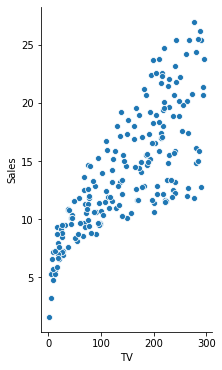

In [25]:
sns.pairplot(veri, x_vars = 'TV', y_vars = "Sales", height =5 ,aspect = 0.6, kind = "scatter")

In [27]:
# Veri setimizin eksenlerini değişkenlere atalım. X ve Y olarak ayırdık.
X = veri['TV']
X.head(3)

0    230.1
1     44.5
2     17.2
Name: TV, dtype: float64

In [29]:
Y = veri['Sales']
Y.head(4)

0    22.1
1    10.4
2     9.3
3    18.5
Name: Sales, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.7,random_state=100) #veriyi train ve test set olarak ayırdık. Eğitim seti oranı %70 olarak seçildi

In [34]:
x_train = x_train[:,np.newaxis] #x_train normalde(140,)olarak ayarlıdır fakat biz newaxismetodu ile(140,1) yaptık
x_test = x_test[:,np.newaxis]

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lineer_regresyon = LinearRegression() #LinearRegression objesini lineer_regresyona değişkenine attık

In [37]:
lineer_regresyon.fit(x_train,y_train) #fit ile modeli öğreniriz.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
#lineer regresyon formüllerinden katsayıları öğrenebiliriz.
print(lineer_regresyon.intercept_)
print(lineer_regresyon.coef_)

6.989665857411679
[0.04649736]


In [39]:
y_pred = lineer_regresyon.predict(x_test)#modelin gücünü ölçmek için xtest kısmını modele input olarak verdik.

In [57]:
t = np.linspace(0,140,60)

In [51]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

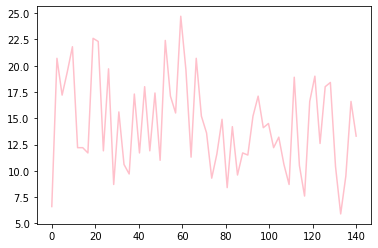

In [59]:
plt.plot(t,y_test,linestyle ="-",color="pink")  #gerçek değerler

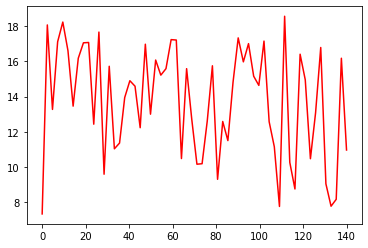

In [62]:
plt.plot(t,y_pred,color ="red")  #tahminlenmiş değerler

test oranı 126   -0.752345
104    2.634663
99     3.923891
92     2.287859
111    3.571923
167   -4.405320
116   -1.262098
96    -4.477544
52     5.548306
69     5.229707
164   -0.539156
124    2.039190
182   -0.902817
154   -0.121870
125   -0.444236
196   -1.669717
194    3.349680
177   -3.203516
163    3.408016
31    -0.339218
11     0.427351
73    -2.006424
15     6.324750
41     1.880302
97    -0.087027
128    7.466966
133    2.390215
82     0.809083
139    5.112973
123    2.486509
83     3.429915
65    -0.897984
151   -1.015846
162   -0.849768
170   -0.914534
77     1.607402
32    -1.909209
173   -3.119821
174   -5.830678
85    -0.772956
168    0.094803
112   -1.059252
171   -0.138481
181   -4.949339
7      0.621352
46    -0.560479
75     0.924529
28     0.341791
29     0.227621
195   -1.165865
40     0.194619
153    4.045337
115    2.118383
64     4.914530
59     1.613341
1      1.341202
192   -1.889420
136    1.320002
152    0.422456
161    2.325510
Name: Sales, dtype: float64


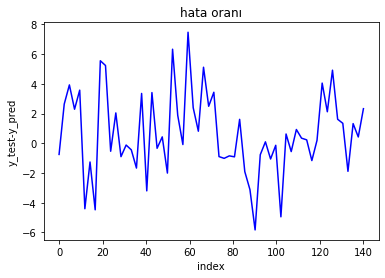

In [67]:
#hatamızı görmek için
fig = plt.figure()
print("test oranı {0}".format(y_test-y_pred))
plt.title("hata oranı")
plt.xlabel("index")
plt.ylabel("y_test-y_pred")
plt.plot(t,y_test-y_pred,color="blue")

In [72]:
#model başarısına bakarsak
from sklearn.metrics import mean_squared_error, r2_score #R SQUARED İÇİN kütüphanemizi çağırdık
ort_hata = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)
print("ortama hata {0} \nr squared {1} ".format(ort_hata,r_squared))

ortama hata 7.97579853285485 
r squared 0.5942987267783302 


Text(0.5, 1.0, 'tahminlenmiş ve gerçek değer arasındaki korelasyon ilişkisi')

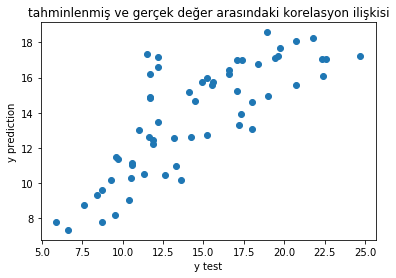

In [76]:
plt.scatter(y_test,y_pred)
plt.xlabel("y test")
plt.ylabel("y prediction")
plt.title("tahminlenmiş ve gerçek değer arasındaki korelasyon ilişkisi")